In [1]:
import numpy as np
import torch
import torch.nn.functional as torchF
import torch.nn as torchNN
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

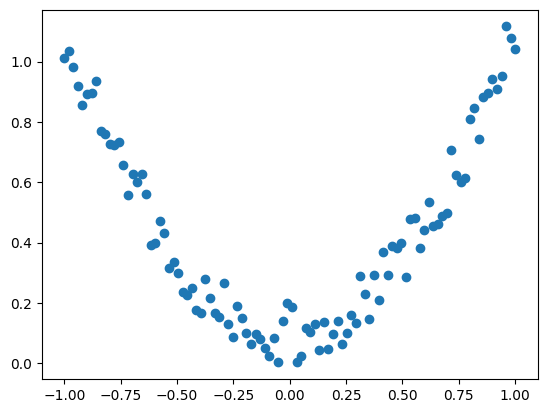

In [2]:
trainX = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
trainY = trainX.pow(2) + 0.2 * torch.rand(trainX.size())                # random noisy

plt.scatter(trainX.data.numpy(), trainY.data.numpy())

In [3]:
class Network(torchNN.Module):
    def __init__(self, featureShape, hiddenNum, outputShape) -> None:
        super(Network, self).__init__()

        self.hidden = torchNN.Linear(featureShape, hiddenNum)
        self.outputLayer = torchNN.Linear(hiddenNum, outputShape)

    def forward(self, inputData):
        x = torchF.relu(self.hidden(inputData))
        x = self.outputLayer(x)
        return x

    def TrainOneStep(self, trainX, trainY, optimizer, lossFunction):
        outputY = self.forward(trainX)
        loss = lossFunction(outputY, trainY)

        optimizer.zero_grad()                       # clear grad
        loss.backward()                             # 计算反向误差
        optimizer.step()

        return outputY, loss

KeyboardInterrupt: 

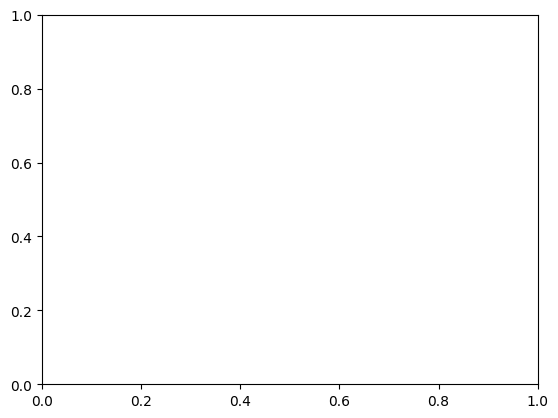

In [4]:
model = Network(1, 10, 1)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
lossFunction = torchNN.MSELoss()

fig = plt.figure()
error = 0.0
for episode in range(100):
    prediction, loss = model.TrainOneStep(trainX, trainY, optimizer, lossFunction)
    error += loss.data.numpy()
    if ( episode - 1 ) % 5 == 0:
        plt.cla()
        plt.scatter(trainX.data.numpy(), trainY.data.numpy())
        plt.plot(trainX.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()
        display.clear_output(wait=True)